Step 1: Data loading time = 0.17 seconds
Baseline training: Epoch 1/5
Baseline training: Epoch 2/5
Baseline training: Epoch 3/5
Baseline training: Epoch 4/5
Baseline training: Epoch 5/5
Baseline model accuracy: 9768/10000 (97.68%)
Step 2: Baseline training time = 129.88 seconds
Autoencoder training: Epoch 1/5


Training autoencoder batches: 100%|██████████| 938/938 [00:20<00:00, 46.79it/s]


Autoencoder training: Epoch 2/5


Training autoencoder batches: 100%|██████████| 938/938 [00:21<00:00, 43.13it/s]


Autoencoder training: Epoch 3/5


Training autoencoder batches: 100%|██████████| 938/938 [00:26<00:00, 34.82it/s]


Autoencoder training: Epoch 4/5


Training autoencoder batches: 100%|██████████| 938/938 [00:24<00:00, 37.92it/s]


Autoencoder training: Epoch 5/5


Training autoencoder batches: 100%|██████████| 938/938 [00:24<00:00, 38.62it/s]


Autoencoder training: Epoch 1/5


Training autoencoder batches: 100%|██████████| 938/938 [00:04<00:00, 219.06it/s]


Autoencoder training: Epoch 2/5


Training autoencoder batches: 100%|██████████| 938/938 [00:03<00:00, 301.15it/s]


Autoencoder training: Epoch 3/5


Training autoencoder batches: 100%|██████████| 938/938 [00:03<00:00, 298.16it/s]


Autoencoder training: Epoch 4/5


Training autoencoder batches: 100%|██████████| 938/938 [00:03<00:00, 296.46it/s]


Autoencoder training: Epoch 5/5


Training autoencoder batches: 100%|██████████| 938/938 [00:02<00:00, 319.80it/s]


Step 3: Unsupervised pretraining time = 145.96 seconds
Supervised training: Epoch 1/5


Training supervised batches: 100%|██████████| 938/938 [00:17<00:00, 53.48it/s]


Supervised training: Epoch 2/5


Training supervised batches: 100%|██████████| 938/938 [00:18<00:00, 50.86it/s]


Supervised training: Epoch 3/5


Training supervised batches: 100%|██████████| 938/938 [00:16<00:00, 57.71it/s]


Supervised training: Epoch 4/5


Training supervised batches: 100%|██████████| 938/938 [00:33<00:00, 28.24it/s]


Supervised training: Epoch 5/5


Training supervised batches: 100%|██████████| 938/938 [00:31<00:00, 29.56it/s]


Test set: Accuracy: 9718/10000 (97.18%)
Step 4: Supervised fine-tuning time = 118.67 seconds


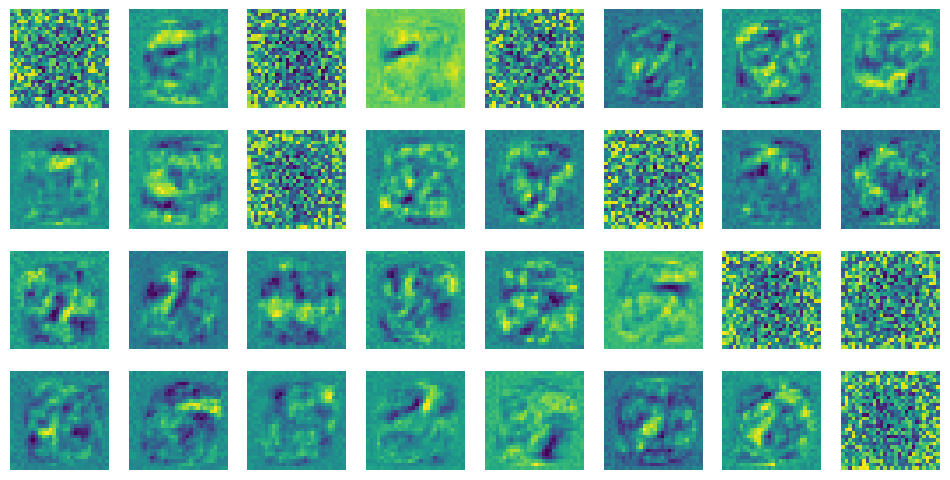

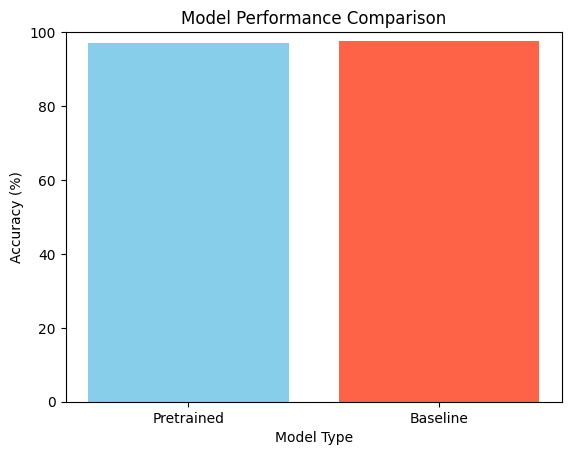

Total execution time = 394.68 seconds


In [2]:
from data_loader import get_mnist_loaders
from training import greedy_layerwise_pretraining, supervised_training, train_baseline_model
from time import time
from visualization import visualize_weights, plot_model_performance

def main():
    # Load data
    start_time = time()
    train_loader, test_loader = get_mnist_loaders()
    step_1_time = time()
    print("Step 1: Data loading time = {:.2f} seconds".format(step_1_time - start_time))

    # Train baseline model
    baseline_accuracy = train_baseline_model(train_loader, test_loader)
    step_2_time = time()
    print("Step 2: Baseline training time = {:.2f} seconds".format(step_2_time - step_1_time))

    # Greedy layer-wise unsupervised pretraining
    pretrained_model = greedy_layerwise_pretraining(train_loader)
    step_3_time = time()
    print("Step 3: Unsupervised pretraining time = {:.2f} seconds".format(step_3_time - step_2_time))

    # Supervised fine-tuning
    pretrained_accuracy = supervised_training(pretrained_model, train_loader, test_loader)
    step_4_time = time()
    print("Step 4: Supervised fine-tuning time = {:.2f} seconds".format(step_4_time - step_3_time))

    # Visualize weights
    visualize_weights(pretrained_model, layer_index=1)

    # Compare performances
    if pretrained_accuracy is None or baseline_accuracy is None:
        raise ValueError("Both pretrained_accuracy and baseline_accuracy must be provided and not None.")
    plot_model_performance(pretrained_accuracy, baseline_accuracy)

    # Total time
    print("Total execution time = {:.2f} seconds".format(step_4_time - start_time))

if __name__ == "__main__":
    main()
